### <p style="text-align: right;"> Alexis Guevara

# Numerical Techniques and Analysis of 1-Dimensional Scalar Wave Equation

## 1. Background and Motivation

The 1-dimensional scalar wave equation is a fundamental model in science, technology, and engineering in illustrating wave propagation phenomena, such as sound, water, and light waves through a medium. The significance of studying such equations lies in their ability to capture the complex dynamics of waves. By solving such equations, insights into wave behavior can be investigated and applied across a wide range of fields.

The 1-D scalar wave equation describes the propagation of waves in one direction. Within acoustics, it helps model the transmission of sound waves through mediums like air and solids. In structural engineering, the 1-D scalar wave equation contributes a critical role in predicting and lessening vibrations in buildings and bridges to ensure their stability and safety.

The 1-D scalar wave equation can be written as

\begin{equation}
    \frac{{\partial^2 u}}{{\partial t^2}} (x,t) - \alpha^2 \frac{{\partial^2 u}}{{\partial x^2}} (x,t) = 0
\end{equation}

with boundary conditions 

\begin{equation}
    u(0,t) = u(L,t) = 0 , 0 < t < T,
\end{equation}

and initial conditions 

\begin{equation}
    u(x,0) = f(x), \frac{{\partial u}}{{\partial t}}(x,0) = g(x), \text{ for } 0 \leq x \leq L ,
\end{equation}

where $x$ is a spatial grid point, $t$ is time, $u = u(x,t)$ is the displacement, $\alpha$ is the wave speed, $T$ is the final time and $L$ is the length of the domain.

## 2. Description of the Numerical Method

### Main Objective of Numerical Method 

Finite differences will be the numerical method used to approximate the solutions to the 1-D scalar wave equation. 

The process of the method begins by constructing a spatial mesh by dividing the spatial domain into discrete points $x_{i}$ and a temporal mesh by dividing the temporal domain into discrete points $t_{j}$. The partial differential equation can then be discretized through the construction of the spatial-temporal mesh with the derivatives being approximated with centered finite differences. Solving for the most advanced time-step approximation in the finite difference formula results in a recursive equation being constructed to approximate the solutions to the wave equation.

Since a centered finite difference requires two time steps, an issue occurs in having the first time step being calculated.
To resolve the issue, a forward finite difference approximation of the initial velocity condition will be done. To improve the approximation, the proceeding error term of the finite difference approximation will be considered and altered to obtain a better approximation of solutions to the wave equation.

After constructing the finite difference approximation methods for the wave equation, the stencil of the numerical method can then be observed.


### Mesh of Numerical Method

The spatial mesh of the numerical method is defined as 

\begin{equation}
    x_{i} = x_L + i \cdot h , i = 0,1,..., m \text{ with } m = \frac{x_R - x_L}{h} \text{ for $x \in [ x_L,x_R]$} . 
\end{equation}

The temporal mesh of the numerical method is defined as 

\begin{equation}
    t_{j} = t_0 + j \cdot \Delta t, j = 0,1,..., N \text{ with } N = \frac{t_f - t_0}{\Delta t} \text{ for $t \in [ t_0,t_f]$} .   
\end{equation}


### Discretization of Partial Differential Equation

Discretizing so that the partial differential equation is only defined at any mesh point $(x_{i},t_{j})$, the wave equation becomes:

\begin{equation}
    \frac{{\partial^{2} u}}{{\partial t^{2}}} (x_{i},t_{j}) - \alpha^2 \frac{{\partial^2 u}}{{\partial x^2}} (x_{i},t_{j}) = 0 .
\end{equation}


### Finite Difference Approximations of Derivatives

The centered finite difference formulas for the second partial derivatives of the function $u(x_{i},t_{j})$ are provided as the following

\begin{equation}
    \begin{aligned}
        \frac{\partial^{2} u}{\partial t^{2}} (x_{i},t_{j}) =&\,\, \frac{u(x_{i},t_{j+1}) - 2u(x_{i},t_{j}) + u(x_{i},t_{j-1})}{\Delta t^2} - \frac{\Delta t^2}{12} \frac{\partial^{4} u}{\partial t^{4}} (x_{i},\mu_{j}) \\
        \frac{\partial^{2} u}{\partial x^{2}} (x_{i},t_{j}) =&\,\, \frac{u(x_{i+1},t_{j}) - 2u(x_{i},t_{j}) + u(x_{i-1},t_{j})}{h^2} - \frac{h^2}{12} \frac{\partial^{4} u}{\partial x^{4}} (\xi_{i},t_j) \\
    \end{aligned}
\end{equation}

for some $\mu_{j} \in (t_{j-1},t_{j+1})$ and for some $\xi_{i} \in (x_{i-1},x_{i+1})$ . 

Substituting the centered finite difference formulas into the discretized wave equation gives

\begin{equation}
    \frac{u(x_{i},t_{j+1}) - 2u(x_{i},t_{j}) + u(x_{i},t_{j-1})}{\Delta t^2} - \alpha^{2} \frac{u(x_{i+1},t_{j}) - 2u(x_{i},t_{j}) + u(x_{i-1},t_{j})}{h^2} = \frac{\Delta t^2}{12} \frac{\partial^{4} u}{\partial t^{4}} (x_{i},\mu_{j}) + \frac{h^2}{12} \frac{\partial^{4} u}{\partial x^{4}} (\xi_{i},t_j) . 
\end{equation}

Neglecting the error terms in the finite difference formulas

\begin{equation}
    \frac{\Delta t^2}{12} \frac{\partial^{4} u}{\partial t^{4}} (x_{i},\mu_{j}) + \frac{h^2}{12} \frac{\partial^{4} u}{\partial x^{4}} (\xi_{i},t_j) 
\end{equation}

we get the difference equation

\begin{equation}
    \frac{u(x_{i},t_{j+1}) - 2u(x_{i},t_{j}) + u(x_{i},t_{j-1})}{\Delta t^2} - \alpha^{2} \frac{u(x_{i+1},t_{j}) - 2u(x_{i},t_{j}) + u(x_{i-1},t_{j})}{h^2} = 0 .
\end{equation}

Define $\lambda = \frac{\alpha \Delta t}{h}$.
Then the difference equation can be written as  

\begin{equation}
    u(x_{i},t_{j+1}) - 2 u(x_{i},t_{j}) + u(x_{i},t_{j-1}) - \lambda^{2} u(x_{i+1},t_{j}) + 2 \lambda^{2} u(x_{i},t_{j}) - \lambda^{2} u(x_{i-1},t_{j}) = 0 .
\end{equation}

Solving for the most advanced time-step approximation, $u(x_{i},t_{j+1})$ gives

\begin{equation}
    u(x_{i},t_{j+1}) = 2 (1 - \lambda^{2}) u(x_{i},t_{j}) + \lambda^{2} (u(x_{i+1},t_{j}) + u(x_{i-1},t_{j})) - u(x_{i},t_{j-1})
\end{equation}

The equation holds for each $i = 1,2,...,m$ and $j = 1,2,...,N$ .

The boundary conditions give 
\begin{equation}
    u(x_{0},t_{j}) = u(x_{m},t_{j}) = 0 \text{  for each $j = 1,2,3,...,N$} .
\end{equation}

The initial condition implies that
\begin{equation}
    u(x_{i},t_{0}) = f(x_{i}) \text{  for each $i = 1,2,...,m-1$} .
\end{equation}

Observing the difference equation to approximate the wave equation at $u(x_{i},t_{j+1})$ requires the values at the $j$th and $(j+1)$th time steps. An issue is then present when $j=0$, since only one time step is available for $u(x_{i},t_{1})$.

Thus, computing an approximation of the wave equation at the initial time step $u(x_{i},t_{1})$ is done through using the initial-velocity condition

\begin{equation}
    \frac{{\partial u}}{{\partial t}}(x,0) = g(x), 0 \leq x \leq L .
\end{equation}

One approach is to approximate $\frac{{\partial u}}{{\partial t}}$ using a forward finite difference approximation

\begin{equation}
    \frac{{\partial u}}{{\partial t}}(x_i,0) = \frac{u(x_{i},t_{1}) - u(x_{i},0)}{\Delta t} - \frac{\Delta t}{2} \frac{\partial^2 u}{\partial t^{2}} (x_i,\tilde{\mu_i}) 
\end{equation}

for some $\tilde{\mu_i} \in (0,t_{1})$.

Solving for $u(x_{i},t_{1})$ in the equation gives

\begin{equation}
    \begin{aligned}
        u(x_{i},t_{1}) =&\,\, u(x_{i},0) + \Delta t \frac{\partial u}{\partial t} (x_{i},0) + \frac{\Delta t^2}{2} \frac{\partial^2 u}{\partial t^{2}} (x_i,\tilde{\mu_i}) \\
        u(x_{i},t_{1}) =&\,\, u(x_{i},0) + \Delta t g(x_{i}) + \frac{\Delta t^2}{2} \frac{\partial^2 u}{\partial t^{2}} (x_i,\tilde{\mu_i}) .
    \end{aligned}
\end{equation}

Neglecting the truncation term in the finite difference formula gives the approximation

\begin{equation}
    u(x_{i},t_{1}) = u(x_{i},0) + \Delta t g(x_{i}) \text{  for each $i=1,...,m-1$} .
\end{equation}

Therefore, the difference equation to approximate $u(x_{i},t_{1})$ is obtained. On the other hand, a better approximation of the time step $u(x_{i},t_{1})$ can be obtained through retaining the truncation term and altering the term to be in terms of $f''$ and $\alpha$ through the following

\begin{equation}
    \frac{\Delta t^2}{2} \frac{\partial^2 u}{\partial t^{2}} (x_i,0) = \alpha^{2} \frac{\partial^2 u}{\partial x^{2}} (x_i,0) = \alpha^{2} \frac{\partial^2 f}{\partial x^{2}} (x_i,0) = \alpha^{2} f''(x_{i})
\end{equation}

Now we have

\begin{equation}
    u(x_{i},t_{1}) = u(x_{i},0) + \Delta t g(x_{i}) + \frac{\alpha^{2} \Delta t^{2}}{2} f''(x_{i}) \text{  if $f''$ exists}
\end{equation}.


In the case if $f''$ does not exist, we will use a centered finite difference to approximate the values of $f$ at the point $x_i$, leading to the following method to be used to approximate $u(x_{i},t_{1})$

\begin{equation}
    u(x_{i},t_{1}) = (1-\lambda^{2}) f(x_{i}) + \frac{\lambda^{2}}{2}( f(x_{i+1}) + f(x_{i-1}) ) + \Delta t g(x_{i}) \text{  where $\lambda = \frac{\alpha \Delta t}{h}$} .
\end{equation}


### Stencil of Numerical Method

Now that the finite difference equations are defined for each $(x_{i},t_{j})$, the stencil of the numerical method to approximate the solutions to the wave equation can be observed.

The black points are the points used within the centered finite difference recursive formula to obtain the approximation of the wave equation at the advanced time step, the blue point in the stencil. 

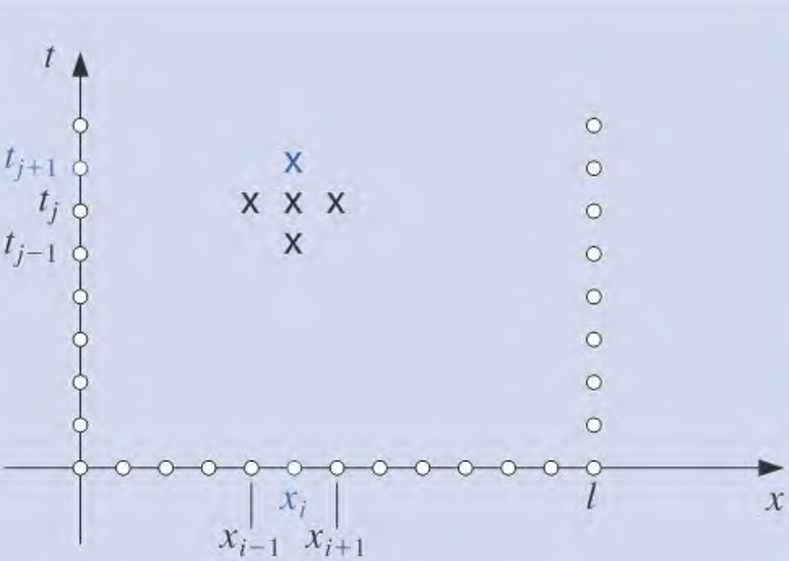

## 3. Theory

Finite Difference Method (FDM): 
The Finite Difference Method (FDM) approximates derivatives in differential equations with discrete differences, enabling numerical solutions to problems that might be challenging to solve analytically. This method is particularly effective for partial differential equations (PDEs), such as the wave equation, which models phenomena like sound or water waves.

Taylor Series Expansion:
The Taylor series expansion allows us to approximate function values at nearby points based on derivatives at a specific point. For a function $f(x)$, its value at $x + h$ can be approximated using 
$$f(x + h) \approx f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \cdots$$
where $h$ is a small step size.

Discretization and the Mesh:
In FDM, the continuous domain is discretized into a mesh of grid points. For the wave equation, $u_{tt} = \alpha^2 u_{xx}$, we discretize time $t$ and space $x$ into steps $\Delta t$ and $\Delta x$, respectively. The derivatives $u_{tt}$ and $u_{xx}$ are approximated by:

$$u_{tt} \approx \frac{u^{n+1}_i - 2u^n_i + u^{n-1}_i}{\Delta t^2}$$

$$u_{xx} \approx \frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2}$$
The derivatives $u_{tt}$ and $u_{xx}$ are approximated by difference quotients, which depend on values of u at discrete grid points.

Von Neumann Stability Analysis:
Stability is crucial for ensuring the fidelity of a numerical simulation over time. Von Neumann stability analysis provides a systematic way to assess stability by considering the growth of errors. Assuming a solution form $u^n_i = G^n e^{ikxi}$, where $G$ is the growth factor, inserting into the discretized wave equation leads to conditions that must be satisfied to prevent error amplification.

Local Truncation Error:
The local truncation error of a numerical method for solving differential equations measures the error made in a single step of the method. It is defined as the difference between the exact solution of the differential equation and the numerical solution after one time step, assuming all previous steps were exact. A numerical method is said to be consistent if the local truncation error tends to zero as the step size tends to zero.

Limitations of the 1-D Scalar wave equation:
1.The equation models wave propagation in only one spatial dimension. 
2.The equation assumes a homogeneous medium where the wave speed c is constant.
3.The 1-D wave equation is linear, meaning it does not account for non-linear effects present in many physical systems, such as shocks.
4.The solution of the wave equation is highly sensitive to initial and boundary conditions. Accurate specification of these conditions is crucial.
5.Solving the 1-D wave equation numerically can introduce errors (e.g., truncation, round-off) and stability issues. High accuracy requires fine discretization, leading to increased computational costs.

Example:
Simple Harmonic Motion: Consider a string fixed at both ends and initially displaced. The wave equation can model the resulting motion. FDM can simulate this scenario, illustrating how wave propagation is numerically captured.

### Proof of Stability
The scalar wave equation is given by
\begin{equation}
u_{tt} = c^2 u_{xx}
\end{equation}

Discretizing the equation on a grid where $u_j^n$ is the approximation of $u$ at position $\Delta x$ and time $n \Delta t$.

Finite difference approximation for the second derivatives is:
\begin{equation}
\frac{\partial^2 u}{\partial t^2} \approx \frac{u_j^{n+1} - 2u_j^n + u_j^{n-1}}{\Delta t^2}
\end{equation}
\begin{equation}
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{\Delta x^2}
\end{equation}

Substituting these into the wave equation:
\begin{equation}
\frac{u_j^{n+1} - 2u_j^n + u_j^{n-1}}{\Delta t^2} = c^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{\Delta x^2}
\end{equation}

Assuming a Fourier solution for $u_j^n$:
\begin{equation}
u_j^n = \hat{u}^n e^{ijk\Delta x}
\end{equation}
where $\hat{u}^n$ = amplitude at time step $n$, $k$ = wave number, $i$ = imaginary unit.

Substituting $u_j^n, u_j^{n+1}, u_j^{n-1}, u_{j+1}^n, u_{j-1}^n$ using the Fourier solution, we get:
\begin{equation}
u_j^{n+1} = \hat{u}^{n+1} e^{ijk\Delta x}
\end{equation}
\begin{equation}
u_j^{n-1} = \hat{u}^{n-1} e^{ijk\Delta x}
\end{equation}
\begin{equation}
u_{j+1}^n = \hat{u}^n e^{i(j+1)k\Delta x} = \hat{u}^n e^{ijk\Delta x} e^{ik\Delta x}
\end{equation}
\begin{equation}
u_{j-1}^n = \hat{u}^n e^{i(j-1)k\Delta x} = \hat{u}^n e^{ijk\Delta x} e^{-ik\Delta x}
\end{equation}

Substituting these expressions into the discretized wave equation:
\begin{equation}
\hat{u}^{n+1} e^{ijk\Delta x} - 2\hat{u}^n e^{ijk\Delta x} + \hat{u}^{n-1} e^{ijk\Delta x} = c^2 \left( \hat{u}^n e^{ijk\Delta x} e^{ik\Delta x} - 2\hat{u}^n e^{ijk\Delta x} + \hat{u}^n e^{ijk\Delta x} e^{-ik\Delta x} \right) \frac{\Delta t^2}{\Delta x^2}
\end{equation}

Since $e^{ijk\Delta x} \neq 0$, we have:
\begin{equation}
\hat{u}^{n+1} - 2\hat{u}^n + \hat{u}^{n-1} = c^2 \left( \hat{u}^n e^{ik\Delta x} - 2\hat{u}^n + \hat{u}^n e^{-ik\Delta x} \right) \frac{\Delta t^2}{\Delta x^2}
\end{equation}

Consider $\hat{u}_k^{n+1} = G \hat{u}_k^n$, $\hat{u}_k^{n-1} = G^{-1} \hat{u}_k^n$, where $G$ is the amplification factor / growth factor

Substituting into the wave equation:
\begin{equation}
G^2 \hat{u}^n - 2\hat{u}^n + G^{-1} \hat{u}^n = c^2 \frac{2 \cos(k \Delta x) - 2}{\Delta x^2} \hat{u}^n \Delta t^2
\end{equation}

Since $\hat{u}^n = G \hat{u}^{n-1}$, replace $\hat{u}^{n-1}$:
\begin{equation}
G^2 - 2G + 1 = c^2 \frac{2 \cos(k \Delta x) - 2}{\Delta x^2} G \Delta t^2
\end{equation}
\begin{equation}
G^2 - 2G + 1 = \left( \frac{c \Delta t}{\Delta x} \right)^2 (2 \cos(k \Delta x) - 2) G
\end{equation}

Rearranging the equation to get it into standard quadratic form:
\begin{equation}
G^2 - 2G + 1 - G \left( \left( \frac{c \Delta t}{\Delta x} \right)^2 2 \cos(k \Delta x) - 2 \right) = 0
\end{equation}
\begin{equation}
G^2 - 2G \left( 1 - \left( \frac{c \Delta t}{\Delta x} \right)^2 \cos(k \Delta x) \right) + \left( \frac{c \Delta t}{\Delta x} \right)^2 \cos(k \Delta x) + 1 = 0
\end{equation}

The quadratic form:
\begin{equation}
\alpha G^2 + \beta G + \gamma = 0
\end{equation}
where $\alpha = 1$, $\beta = -2 \left[ 1 - \left( \frac{c \Delta t}{\Delta x} \right)^2 \cos(k \Delta x) \right]$, $\gamma = 1$.

Performing von Neumann stability analysis,
\begin{equation}
\cos(k \Delta x) = 1 - 2 \sin^2 \left( \frac{k \Delta x}{2} \right)
\end{equation}
\begin{equation}
\cos(k \Delta x) - 1 = -2 \sin^2 \left( \frac{k \Delta x}{2} \right)
\end{equation}

So,
\begin{equation}
G = \frac{-\left[ 2 + \lambda^2 (2 \cos(k \Delta x) - 2) \right] \pm \sqrt{\left( 2 + \lambda^2 (2 \cos(k \Delta x) - 2) \right)^2 - 4}}{4}
\end{equation}
where $\lambda = \frac{c \Delta t}{\Delta x}$, $\theta = \lambda \sin \left( \frac{k \Delta x}{2} \right)$.

Thus,
\begin{equation}
G = 1 - 2\theta^2 \pm 2\theta \sqrt{\theta^2 - 1}
\end{equation}

Case I: $|\theta| < 1$
\begin{equation}
|G|^2 = (1 - 2\theta^2)^2 + 4\theta^2 (1 - \theta^2) = 1
\end{equation}
This shows that when $\theta$ is real and $|\theta| \leq 1$, $|G| = 1$, which means the scheme is stable.

Case II: $|\theta| > 1$
Here, the square root term $\sqrt{\theta^2 - 1}$ becomes real and positive.
\begin{equation}
G = 1 - 2\theta^2 \pm 2\theta \sqrt{\theta^2 - 1}
\end{equation}
\begin{equation}
|G|^2 = (1 - 2\theta^2 + 2\theta \sqrt{\theta^2 - 1})^2
\end{equation}
\begin{equation}
= 1 - 4\theta^4 + 4\theta^2
\end{equation}
\begin{equation}
|G|^2 > 1
\end{equation}
This shows instability. Therefore the scheme is unstable.

Case III: Boundary case, $|\theta| = 1$
When $\theta = 1$, the square root term becomes zero:
\begin{equation}
G = 1 - 2 \times 1^2 \pm 2 \times 1 \times 0
\end{equation}
\begin{equation}
G = -1
\end{equation}
\begin{equation}
|G| = 1
\end{equation}
This is the critical point where $|G| = 1$, indicating the method remains stable.

Conclusion: For the entire range of $\theta$, $\theta = \lambda \sin \left( \frac{k \Delta x}{2} \right)$, the stability condition based on $|G| \leq 1$ appears to be satisfied as long as the CFL condition $\lambda = \frac{c \Delta t}{\Delta x} \leq 1$ holds. This condition ensures that the method is stable for all wave numbers $k$.


### Proof of Consistency
We start with the wave equation:
\begin{equation}
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
\end{equation}

For a forward difference approximation for the first time derivative, we have:
\begin{equation}
\frac{\partial u}{\partial t}(x_i, t_0) \approx \frac{u(x_i, t_1) - u(x_i, t_0)}{k}
\end{equation}

Using Taylor series expansion around \( (x_i, t_0) \):
\begin{equation}
u(x_i, t_1) = u(x_i, t_0) + k \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + O(k^3)
\end{equation}

Substituting this into the forward difference approximation:
\begin{equation}
\frac{\partial u}{\partial t}(x_i, t_0) = \frac{u(x_i, t_1) - u(x_i, t_0)}{k}
\end{equation}
\begin{equation}
\frac{\partial u}{\partial t}(x_i, t_0) \approx \frac{\left( u(x_i, t_0) + k \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + O(k^3) \right) - u(x_i, t_0)}{k}
\end{equation}

Simplifying, we get:
\begin{equation}
\frac{\partial u}{\partial t}(x_i, t_0) \approx \frac{u(x_i, t_0) + k \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + O(k^3) - u(x_i, t_0)}{k}
\end{equation}
\begin{equation}
= \frac{k \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + O(k^3)}{k}
\end{equation}
\begin{equation}
= \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + O(k^2)
\end{equation}

Thus, the local truncation error is:
\begin{equation}
\tau = \left| \frac{\partial u}{\partial t}(x_i, t_0) - \left( \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + O(k^2) \right) \right|
\end{equation}
\begin{equation}
= \frac{k}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + O(k^2)
\end{equation}

As \( k \to 0 \), the truncation error \( \tau \to 0 \), proving the consistency of the forward difference approximation.

For the centered difference approximation for both time and space derivatives, we start with the wave equation:
\begin{equation}
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
\end{equation}

Using the centered difference approximation for the second time derivative at time \( t_j \):
\begin{equation}
\frac{\partial^2 u}{\partial t^2}(x_i, t_j) \approx \frac{u(x_i, t_{j+1}) - 2u(x_i, t_j) + u(x_i, t_{j-1})}{k^2}
\end{equation}

Using the centered difference approximation for the second space derivative at position \( x_i \):
\begin{equation}
\frac{\partial^2 u}{\partial x^2}(x_i, t_j) \approx \frac{u(x_{i+1}, t_j) - 2u(x_i, t_j) + u(x_{i-1}, t_j)}{h^2}
\end{equation}

Substituting these approximations into the wave equation:
\begin{equation}
\frac{u(x_i, t_{j+1}) - 2u(x_i, t_j) + u(x_i, t_{j-1})}{k^2} = c^2 \frac{u(x_{i+1}, t_j) - 2u(x_i, t_j) + u(x_{i-1}, t_j)}{h^2}
\end{equation}


To show consistency, we need to prove that the truncation error of the finite difference approximation goes to zero as the grid spacing and time step go to zero.

Local Truncation Error for Time Derivative:

Using a Taylor series expansion around \( (x_i, t_0) \):
\begin{equation}
u(x_i, t_1) = u(x_i, t_0) + k \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_0) + O(k^4)
\end{equation}

The forward difference approximation for \( \frac{\partial u}{\partial t} \) is:
\begin{equation}
\frac{u(x_i, t_1) - u(x_i, t_0)}{k} = \frac{\left( u(x_i, t_0) + k \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_0) + O(k^4) \right) - u(x_i, t_0)}{k}
\end{equation}
\begin{equation}
= \frac{k \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_0) + O(k^4)}{k}
\end{equation}
\begin{equation}
= \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + \frac{k^2}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_0) + O(k^3)
\end{equation}

Thus, the local truncation error is:
\begin{equation}
\tau = \left| \frac{\partial u}{\partial t}(x_i, t_0) - \left( \frac{\partial u}{\partial t}(x_i, t_0) + \frac{k}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + \frac{k^2}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_0) + O(k^3) \right) \right|
\end{equation}
\begin{equation}
= \frac{k}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_0) + \frac{k^2}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_0) + O(k^3)
\end{equation}

As \( k \to 0 \), the truncation error \( \tau \to 0 \), proving consistency for the forward difference approximation.

Local Truncation Error for Second Time Derivative:

Using a Taylor series expansion around \( (x_i, t_j) \):
\begin{equation}
u(x_i, t_{j+1}) = u(x_i, t_j) + k \frac{\partial u}{\partial t}(x_i, t_j) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_j) + \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_j) + O(k^4)
\end{equation}
\begin{equation}
u(x_i, t_{j-1}) = u(x_i, t_j) - k \frac{\partial u}{\partial t}(x_i, t_j) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_j) - \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_j) + O(k^4)
\end{equation}

Substituting these into the centered difference approximation:
\begin{equation}
\frac{u(x_i, t_{j+1}) - 2u(x_i, t_j) + u(x_i, t_{j-1})}{k^2} = \frac{\left( u(x_i, t_j) + k \frac{\partial u}{\partial t}(x_i, t_j) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_j) + \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_j) \right) - 2u(x_i, t_j) + \left( u(x_i, t_j) - k \frac{\partial u}{\partial t}(x_i, t_j) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_j) - \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_j) \right)}{k^2}
\end{equation}

Simplifying, we get:
\begin{equation}
\frac{u(x_i, t_{j+1}) - 2u(x_i, t_j) + u(x_i, t_{j-1})}{k^2} = \frac{u(x_i, t_j) + k \frac{\partial u}{\partial t}(x_i, t_j) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_j) + \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_j) - 2u(x_i, t_j) + u(x_i, t_j) - k \frac{\partial u}{\partial t}(x_i, t_j) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_j) - \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_j)}{k^2}
\end{equation}
\begin{equation}
= \frac{\frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_j) + \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_j) + \frac{k^2}{2} \frac{\partial^2 u}{\partial t^2}(x_i, t_j) - \frac{k^3}{6} \frac{\partial^3 u}{\partial t^3}(x_i, t_j)}{k^2}
\end{equation}
\begin{equation}
= \frac{\partial^2 u}{\partial t^2}(x_i, t_j) + O(k^2)
\end{equation}

Thus, the local truncation error is:
\begin{equation}
\tau = O(k^2)
\end{equation}

Similarly, for the spatial discretization:
\begin{equation}
\frac{u(x_{i+1}, t_j) - 2u(x_i, t_j) + u(x_{i-1}, t_j)}{h^2} = \frac{\partial^2 u}{\partial x^2}(x_i, t_j) + O(h^2)
\end{equation}

Therefore, as \( k, h \to 0 \), the truncation error \( \tau \to 0 \), and the finite difference approximations converge to the continuous partial differential equation, proving consistency.

## 4. Implementation

### Libraries Used

In [1]:
from IPython.display import display, clear_output
import time  
import numpy as np
import matplotlib.pyplot as plt

### 1-D Scalar Wave Equation

In [2]:
def ScalarWaveEquation_1D(h, cfl, a, L, T, f, df2, g, method, is_movie):
    # INPUTS: 
    #   h   - Spatial step size
    #   cfl - CFL condition
    #   a   - Wave speed
    #   L   - Length of domain
    #   T   - Final time
    #   f   - Initial Displacement
    #   df2 - Second derivative of f
    #   g   - Initial Velocity
    #   method   - Whether to use first or second method to approximate first time step
    #   is_movie - Whether to animate solution
    
    # OUTPUTS:
    #   x - Spatial grid
    #   t - Computed time
    #   u - Approximate solution
    
    delta_t = cfl * h / a          # Time step size [defined through CFL condition]
    N_x = int(L / h)               # Number of Spatial Grid points
    N_t = max(int(T / delta_t), 2) # Number of Time Grid points

    # Initialize Spatial & Temporal Grids, Approximate Solutions
    x = np.linspace(0, L, N_x + 1)  
    t = np.linspace(0, T, N_t + 1)
    u = np.zeros((N_x + 1, N_t + 1))
    
    # Initial Condition
    u[:, 0] = f(x)
    
    # Forward Finite Difference Methods for First Time Step
    if method == 1: # Initial Approximation
        u[:, 1] = u[:, 0] + delta_t * g(x)  
    if method == 2: # Improved Approximation
        u[:, 1] = u[:, 0] + delta_t * g(x) + (0.5) * (a**2) * (delta_t**2) * (df2(x)) 
    
    # Boundary Conditions
    u[0, :]  = 0
    u[-1, :] = 0 
    
    # Animation of Solutions
    if is_movie:
        fig = plt.figure(figsize=(5,5))
        plt.plot(x, u[:, 0])
        plt.xlim(min(x), max(x))
        plt.ylim(-2, 2)
        plt.xlabel('$x$')
        plt.ylabel('Approximation of $u$')
        plt.title('time '+format(0,'.2f'))
        time.sleep(0.1)
        clear_output(wait=True)
        display(fig)
        fig.clear()
    
    # Centered Finite Difference for Second -> Last Time Step
    for n in range(1, N_t):
        u[1:-1, n+1] = 2 * (1 - cfl**2) * u[1:-1, n] - u[1:-1, n-1] + cfl**2 * (u[2:, n] + u[:-2, n])
        
        # Animation of Solutions
        if is_movie:
            plt.plot(x, u[:, n+1])
            plt.xlim(min(x), max(x))
            plt.ylim(-2, 2)
            plt.xlabel('$x$')
            plt.ylabel('Approximation of $u$')
            plt.title('time '+format(n * delta_t,'.2f'))
            time.sleep(0.1)
            clear_output(wait=True)
            display(fig)
            fig.clear()

    # Return Approximate Solutions, Spatial Grid Points, Computed Time
    return u, x, t

## 5. Verification

To verify the numerical method, convergence plots will be computed for test cases using the function 'ScalarWaveEquation_1D' to determine the order of the finite difference approximation method. Since the second derivative of the initial displacement $f(x)$ exists, we will utilize the second derivative of $f(x)$ in the improved approximation of the first time step.

### Test Case 1

Consider the following hyperbolic problem
\begin{equation}
    \frac{{\partial^2 u}}{{\partial t^2}} (x,t) - 4 \frac{{\partial^2 u}}{{\partial x^2}} (x,t) = 0
\end{equation}

with boundary conditions 

\begin{equation}
    u(0,t) = u(1,t) = 0 , \text{ for } 0 < t,
\end{equation}

and initial conditions 

\begin{equation}
    u(x,0) = \sin(\pi x), \frac{{\partial u}}{{\partial t}}(x,0) = 0, \text{ for } 0 \leq x \leq 1 ,
\end{equation}

The solution will be approximated using $\lambda = 0.5$ and maximum time $T = 1$. The approximations will then be compared to the results with the exact solution:

\begin{equation}
    u(x,t) = \sin(\pi x ) \cdot \cos(2 \pi t)
\end{equation}

In [ ]:
# Convergence Plot [Method 1]
# Expected Result: Approximation yields an order of approximation of 1

# Parameters
cfl = 0.5
a = 2
L = 1
T = 1
method   = 1
is_movie = False

def f(x):
    return np.sin(np.pi * x)
def g(x):
    return 0
def df2(x):
    return - (np.pi**2) * np.sin(np.pi * x)

# Exact Solution
def u_exact(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

# Convergence plot
errors = []
hs = []

for k in range(1, 10):
    h = 2**-k
    hs.append(h)
    u_approx, x, t = ScalarWaveEquation_1D(h, cfl, a, L, T, f, df2, g, method, is_movie)
    exact = u_exact(x[:, np.newaxis], t[np.newaxis, :])
    error = np.max(np.abs(u_approx - exact))
    errors.append(error)

# Convergence Plot
plt.loglog(hs, errors, 'b*-')
plt.loglog(hs, [h**1 for h in hs], 'r--')
plt.xlabel('Spatial step size $h$')
plt.ylabel('Maximum Absolute Error')
plt.title('Convergence Plot of ScalarWaveEquation_1D')
plt.legend(['Error', '$h^1$'])
plt.show()


In [ ]:
# Convergence Plot [Method 2]
# Expected Result: Approximation yields an order of approximation of 2

# Parameters
cfl = 0.5
a = 2
L = 1
T = 1
method   = 2
is_movie = False

def f(x):
    return np.sin(np.pi * x)
def g(x):
    return 0
def df2(x):
    return - (np.pi**2) * np.sin(np.pi * x)

# Exact Solution
def u_exact(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

# Convergence plot
errors = []
hs = []
for k in range(1, 10):
    h = 2**-k
    hs.append(h)
    u_approx, x, t = ScalarWaveEquation_1D(h, cfl, a, L, T, f, df2, g, method, is_movie)
    exact = u_exact(x[:, np.newaxis], t[np.newaxis, :])
    error = np.max(np.abs(u_approx - exact))
    errors.append(error)

# Convergence Plot
plt.loglog(hs, errors, 'b*-')
plt.loglog(hs, [h**2 for h in hs], 'r--')
plt.xlabel('Spatial step size $h$')
plt.ylabel('Maximum Absolute Error')
plt.title('Convergence Plot of ScalarWaveEquation_1D')
plt.legend(['Error', '$h^2$'])
plt.show()

### Test Case 2

Consider the following hyperbolic problem
\begin{equation}
    \frac{{\partial^2 u}}{{\partial t^2}} (x,t) - \frac{1}{16 \pi^{2}} \frac{{\partial^2 u}}{{\partial x^2}} (x,t) = 0
\end{equation}

with boundary conditions 

\begin{equation}
    u(0,t) = u(0.5,t) = 0 , \text{ for } 0 < t,
\end{equation}

and initial conditions 

\begin{equation}
    u(x,0) = 0, \frac{{\partial u}}{{\partial t}}(x,0) = \sin(4 \pi x), \text{ for } 0 \leq x \leq 0.5 ,
\end{equation}

The solution will be approximated using $\lambda = \frac{1}{\pi}$ and maximum time $T = 0.5$. The approximations will then be compared to the results with the exact solution:

\begin{equation}
    u(x,t) = \sin(t) \cdot \sin(4 \pi x)
\end{equation}

In [ ]:
# Convergence Plot [Method 1]
# Expected Result: Approximation yields an order of approximation of 1

# Parameters
cfl = 1 / np.pi
a = 1 / (4 * (np.pi))
L = 0.5
T = 0.5
method   = 1
is_movie = False

def f(x):
    return 0
def g(x):
    return np.sin(4 * np.pi * x)
def df2(x):
    return 0

# Exact Solution
def u_exact(x, t):
    return np.sin(t) * np.sin(4 * np.pi * x)

# Convergence plot
errors = []
hs = []

for k in range(4, 10):
    h = 2**-k
    hs.append(h)
    u_approx, x, t = ScalarWaveEquation_1D(h, cfl, a, L, T, f, df2, g, method, is_movie)
    exact = u_exact(x[:, np.newaxis], t[np.newaxis, :])
    error = np.max(np.abs(u_approx - exact))
    errors.append(error)

# Convergence Plot
plt.loglog(hs, errors, 'b*-')
plt.loglog(hs, [h**1 for h in hs], 'r--')
plt.xlabel('Spatial step size $h$')
plt.ylabel('Maximum Absolute Error')
plt.title('Convergence Plot of ScalarWaveEquation_1D')
plt.legend(['Error', '$h^1$'])
plt.show()

In [ ]:
# Convergence Plot [Method 2]
# Expected Result: Approximation yields an order of approximation of 2

# Parameters
cfl = 1 / np.pi
a = 1 / (4 * (np.pi))
L = 0.5
T = 0.5
method   = 2
is_movie = False

def f(x):
    return 0
def g(x):
    return np.sin(4 * np.pi * x)
def df2(x):
    return 0

# Exact Solution
def u_exact(x, t):
    return np.sin(t) * np.sin(4 * np.pi * x)

# Convergence plot
errors = []
hs = []

for k in range(4, 10):
    h = 2**-k
    hs.append(h)
    u_approx, x, t = ScalarWaveEquation_1D(h, cfl, a, L, T, f, df2, g, method, is_movie)
    exact = u_exact(x[:, np.newaxis], t[np.newaxis, :])
    error = np.max(np.abs(u_approx - exact))
    errors.append(error)

# Convergence Plot
plt.loglog(hs, errors, 'b*-')
plt.loglog(hs, [h**2 for h in hs], 'r--')
plt.xlabel('Spatial step size $h$')
plt.ylabel('Maximum Absolute Error')
plt.title('Convergence Plot of ScalarWaveEquation_1D')
plt.legend(['Error', '$h^2$'])
plt.show()

### Test Case 3

Consider the following hyperbolic problem
\begin{equation}
    \frac{{\partial^2 u}}{{\partial t^2}} (x,t) - \frac{{\partial^2 u}}{{\partial x^2}} (x,t) = 0
\end{equation}

with boundary conditions 

\begin{equation}
    u(0,t) = u(\pi,t) = 0 , \text{ for } 0 < t,
\end{equation}

and initial conditions 

\begin{equation}
    u(x,0) = \sin(x), \frac{{\partial u}}{{\partial t}}(x,0) = 0, \text{ for } 0 \leq x \leq \pi ,
\end{equation}

The solution will be approximated using $\lambda = \frac{1}{2 \pi}$ and maximum time $T = 0.5$. The approximations will then be compared to the results with the exact solution:

\begin{equation}
    u(x,t) = \cos(t) \cdot \sin(x)
\end{equation}

In [ ]:
# Convergence Plot [Method 1]
# Expected Result: Approximation yields an order of approximation of 1
# Result will be identical to [Method 2] since f(x) = 0 = f''(x)

# Parameters
cfl = 0.5 / np.pi
a = 1
L = np.pi
T = 0.5
is_movie = False
method   = 1

def f(x):
    return np.sin(x)
def g(x):
    return 0
def df2(x):
    return - np.sin(x)

# Exact Solution
def u_exact(x, t):
    return np.cos(t) * np.sin(x)

# Convergence plot
errors = []
hs = []

for k in range(4, 10):
    h = 2**-k
    hs.append(h)
    u_approx, x, t = ScalarWaveEquation_1D(h, cfl, a, L, T, f, df2, g, method, is_movie)
    exact = u_exact(x[:, np.newaxis], t[np.newaxis, :])
    error = np.max(np.abs(u_approx - exact))
    errors.append(error)

# Convergence Plot
plt.loglog(hs, errors, 'b*-')
plt.loglog(hs, [h**1 for h in hs], 'r--')
plt.xlabel('Spatial step size $h$')
plt.ylabel('Maximum Absolute Error')
plt.title('Convergence Plot of ScalarWaveEquation_1D')
plt.legend(['Error', '$h^1$'])
plt.show()

In [ ]:
# Convergence Plot [Method 2]
# Expected Result: Approximation yields an order of approximation of 2

# Parameters
cfl = 0.5 / np.pi
a = 1
L = np.pi
T = 0.5
is_movie = False
method   = 2

def f(x):
    return np.sin(x)
def g(x):
    return 0
def df2(x):
    return - np.sin(x)

# Exact Solution
def u_exact(x, t):
    return np.cos(t) * np.sin(x)

# Convergence plot
errors = []
hs = []

for k in range(4, 10):
    h = 2**-k
    hs.append(h)
    u_approx, x, t = ScalarWaveEquation_1D(h, cfl, a, L, T, f, df2, g, method, is_movie)
    exact = u_exact(x[:, np.newaxis], t[np.newaxis, :])
    error = np.max(np.abs(u_approx - exact))
    errors.append(error)

# Convergence Plot
plt.loglog(hs, errors, 'b*-')
plt.loglog(hs, [h**2 for h in hs], 'r--')
plt.xlabel('Spatial step size $h$')
plt.ylabel('Maximum Absolute Error')
plt.title('Convergence Plot of ScalarWaveEquation_1D')
plt.legend(['Error', '$h^2$'])
plt.show()

## 6. Application 

The Gaussian Pulse function is a common bell-shaped curve. The pulse has the same characteristics as the normal distribution and is defined as the following:

\begin{equation}
    f(x) = e^{- \frac{(x - x_{0})^{2}}{2 \sigma^{2}}}
\end{equation}

where $x$ is the input variable, $x_{0}$ is the location, and $\sigma$ is the standard deviation.

In our demonstration, the location for the Gaussian Pulse $x_{0}$, will be $0$ and the standard deviation $\sigma$ will be $1$.

The finite difference method 'ScalarWaveEquation_1D' will be used to demonstrate the numerical solution to the Gaussian Pulse through an animation.

In [ ]:
# Animation of Numerical Approximations

# Parameters
h = 0.05
cfl = 0.5
a = 1
L = 1
T = 1
is_movie = True
method   = 2

# Initial Conditions
def f(x): # Initial Displacement
    omega = 1.0
    return np.exp( -(x**2 + 1) / (2 * (omega)**2) )
def g(x): # Initial Velocity
    return 0
def df2(x):
    omega = 1.0
    return (1 / omega**4) * ((x**2 + 1) - (omega**2) ) * np.exp( -(x**2 + 1) / (2 * (omega)**2) )

u, x, t = ScalarWaveEquation_1D(h, cfl, a, L, T, f, df2, g, method, is_movie)

## 7. Conclusion

### Strengths

#### Simple to Implement

Finite difference methods are simple to implement as the numerical method does not require complex mathematical techniques and can be easily implemented within a programming language. 

The numerical method can be applied to a multitude of partial differential equations since finite difference formulas can be structured to approximate the derivatives within a partial differential equation without having to rely on analytical derivatives.

#### Easy to obtain Higher-Order Approximations

Finite difference methods make it easier to obtain higher-order approximations of derivatives. The forward and centered finite difference approximations are first-order and second-order accurate, respectively.

Higher-order approximations of derivatives can be obtained by using more points in the mesh within the finite difference approximation.

For example, the second-order central finite difference formula to approximate the first derivative of a function $u(x)$ is 

\begin{equation}
    \frac{d u}{d x} (x_{i}) \approx  \frac{u(x_{i+1}) - u(x_{i-1})}{h}
\end{equation}

and the fourth-order centered finite difference formula to approximate the first derivative of a function $u(x)$ is

\begin{equation}
    \frac{d u}{d x} (x_{i}) \approx \frac{-u(x_{i+2}) + 8 u(x_{i+1}) - 8 u(x_{i-1}) + u(x_{i-2})}{12h} . 
\end{equation}

Although higher-order methods can provide more accurate approximations, they require more function evaluations and are more computationally expensive.
When using higher-order methods, it is also required that the function is sufficiently smooth.

### Weaknesses

#### Accuracy

Finite difference methods create two types of error: truncation error and round-off error. Although finite difference methods can consider the amount of error a method creates that can be observed through Taylor series expansions, the errors will stay present within the approximation.


#### Inability in Handling Discontinuities and Shocks

Finite difference methods require the function to be smooth.
If the function has a discontinuity, the finite difference approximation will attempt to approximate the value of the function and can lead to giving poor results and large errors.

If the function has a shock, the finite difference approximation assumes that the function changes gradually between the points within the constructed mesh, with no consideration of the behavior of the shock.


## 8. References

[1] Burden, R.L., Faires, J.D., Burden A.M (2016) Numerical Analysis. 10th Edition, Cengage Learning, Boston, 757-765.

[2] Strang, G. (2007). Computational science and engineering. 1st Edition, Wellesley-Cambridge Press, 485-489.

### Congratulations! It is done!

Please submit your semester project on Canvas following the procedure described in the Jupyter notebook `slides_review_basics_programming`.

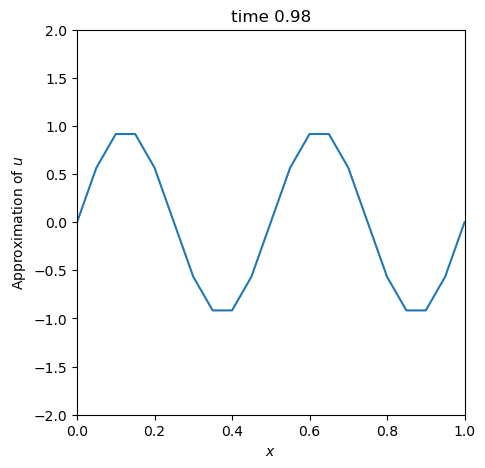

<Figure size 500x500 with 0 Axes>

In [6]:
# Animation of Numerical Approximations

# Parameters
h = 0.05
cfl = 0.5
a = 1
L = 1
T = 1
method   = 1
is_movie = True

def f(x):
    return np.sin(4 * np.pi * x)
def g(x):
    return 0
def df2(x):
    return - (np.pi**2) * np.sin(np.pi * x)

u, x, t = ScalarWaveEquation_1D(h, cfl, a, L, T, f, df2, g, method, is_movie)